In [35]:
import pandas as pd
import sqlite3 
import requests
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
style.use('seaborn')
%matplotlib inline
import scipy.stats as stats


In [2]:
conn = sqlite3.connect('uw-madison-courses/database.sqlite3')
c = conn.cursor()

A simple sql querying function that returns everything in dataframe form, saving a line or two each time I have a sql query

In [3]:
def sql_df(query):
    df = pd.DataFrame(c.execute('''{}'''.format(query)).fetchall())
    df.columns = [x[0] for x in c.description]
    return df

A master course frame, so that name, code, uuid and course_uuid are in one place and can be used to check

In [4]:
courses = sql_df('''select uuid, course_uuid, term_code, course_offerings.name,
subject_memberships.subject_code, subjects.name as subject
from course_offerings
join subject_memberships on course_offerings.uuid = subject_memberships.course_offering_uuid
join subjects on subject_memberships.subject_code = subjects.code
''')
courses.head(25)


,uuid,course_uuid,term_code,name,subject_code,subject
0,344b3ebe-da7e-314c-83ed-9425269695fd,a3e3e1c3-543d-3bb5-ae65-5f2aec4ad1de,1092,Cooperative Education Prog,220,Chemical and Biological Engineering
1,344b3ebe-da7e-314c-83ed-9425269695fd,a3e3e1c3-543d-3bb5-ae65-5f2aec4ad1de,1092,Cooperative Education Prog,320,Electrical and Computer Engineering
2,344b3ebe-da7e-314c-83ed-9425269695fd,a3e3e1c3-543d-3bb5-ae65-5f2aec4ad1de,1092,Cooperative Education Prog,346,Engineering Mechanics and Astronautics
3,344b3ebe-da7e-314c-83ed-9425269695fd,a3e3e1c3-543d-3bb5-ae65-5f2aec4ad1de,1092,Cooperative Education Prog,612,Mechanical Engineering
4,344b3ebe-da7e-314c-83ed-9425269695fd,a3e3e1c3-543d-3bb5-ae65-5f2aec4ad1de,1092,Cooperative Education Prog,636,Materials Science and Engineering
5,344b3ebe-da7e-314c-83ed-9425269695fd,a3e3e1c3-543d-3bb5-ae65-5f2aec4ad1de,1092,Cooperative Education Prog,207,Biomedical Engineering
6,344b3ebe-da7e-314c-83ed-9425269695fd,a3e3e1c3-543d-3bb5-ae65-5f2aec4ad1de,1092,Cooperative Education Prog,490,Industrial and Systems Engineering
7,344b3ebe-da7e-314c-83ed-9425269695fd,a3e3e1c3-543d-3bb5-ae65-5f2aec4ad1de,1092,Cooperative Education Prog,240,Civil and Environmental Engineering
8,f718e6cd-33f0-3c14-a9a6-834d9c3610a8,a3e3e1c3-543d-3bb5-ae65-5f2aec4ad1de,1082,Cooperative Education Prog,220,Chemical and Biological Engineering
9,f718e6cd-33f0-3c14-a9a6-834d9c3610a8,a3e3e1c3-543d-3bb5-ae65-5f2aec4ad1de,1082,Cooperative Education Prog,320,Electrical and Computer Engineering


Note that the first 200 classes are 'Cooperative Education Prog', there's one for each subject. This looks like an interdisciplinary catchall, there are courses listed, with grades, but I think it would be safest to ignore this.

Here's a function that takes in a class name, finds the appropriate uuid's from the course info data frame and returns a new data frame with all the grades from all sections of that class in the grade distributions dataframe

In [5]:
def get_grades(class_name):
    uuid_list = list(courses[courses['name']==class_name]['uuid'])
    if len(uuid_list) == 1:
        grades = sql_df('''select * from grade_distributions 
        where course_offering_uuid = "{}" '''.format(uuid_list[0]))
    else:
        grades = sql_df('''select * from grade_distributions 
        where course_offering_uuid = "{}" '''.format(uuid_list[0]))
        for n in range(1,len(uuid_list)):
            temp = sql_df('''select * from grade_distributions 
            where course_offering_uuid = "{}" '''.format(uuid_list[n]))
            grades = pd.concat([grades,temp])
    return grades

In [49]:
get_grades('Intro Financial Accounting')

,course_offering_uuid,section_number,n_count,c_count,f_count,cr_count,p_count,nw_count,other_count,bc_count,u_count,d_count,ab_count,a_count,s_count,i_count,b_count,nr_count
0,e3db0b32-2bf9-3d93-b456-56b9187f4ab5,1,0,9,0,0,0,0,1,2,0,1,7,9,0,0,17,0
1,e3db0b32-2bf9-3d93-b456-56b9187f4ab5,2,0,4,1,0,0,0,0,6,0,5,2,11,0,0,18,0
2,e3db0b32-2bf9-3d93-b456-56b9187f4ab5,3,0,8,0,0,0,0,0,3,0,2,3,12,0,0,10,0
3,e3db0b32-2bf9-3d93-b456-56b9187f4ab5,4,0,5,0,0,0,0,0,5,0,3,6,8,0,0,15,0
4,e3db0b32-2bf9-3d93-b456-56b9187f4ab5,5,0,9,0,0,0,0,0,7,0,1,5,8,0,0,12,0
0,bb3cdfec-c68b-3bcf-b13f-caf012124fdc,1,0,6,0,0,0,0,0,5,0,2,3,6,0,0,14,0
1,bb3cdfec-c68b-3bcf-b13f-caf012124fdc,2,0,9,0,0,0,0,0,3,0,3,3,8,0,0,11,0
2,bb3cdfec-c68b-3bcf-b13f-caf012124fdc,3,0,7,0,0,0,0,0,2,0,3,8,6,1,0,13,0
3,bb3cdfec-c68b-3bcf-b13f-caf012124fdc,4,0,7,0,0,0,0,0,3,0,2,6,2,0,0,9,0
4,bb3cdfec-c68b-3bcf-b13f-caf012124fdc,5,0,3,0,0,0,0,0,4,0,1,4,11,0,0,13,0


The only challenge is that these sql queries return everything as strings (also, there's some extraneous information), here's a function that takes in this output and returns it as a simpler table with the sums of the counts and also the overall ratio of grades.

In [6]:
def neaten_grades(grade_df):
    grade_types = ['a','ab','b','bc','c','d','f']
    grades = []
    ratios = []
    for grade in grade_types:
        grades.append(sum([int(x) for x in list(grade_df['{}_count'.format(grade)])]))
    for grade in grades:
        ratios.append(grade/sum(grades))
    df = pd.DataFrame({'counts':grades, 'ratio':ratios}, index=grade_types)
    
    return df

In [56]:
neaten_grades(get_grades('Intro Financial Accounting'))

,counts,ratio
a,2376,0.219532
ab,1303,0.120392
b,3511,0.324402
bc,1121,0.103576
c,1786,0.165019
d,586,0.054144
f,140,0.012935


Two functions to compare grade distributions across classes. The first takes in two class names, looks up the relevant grade data and plots the grade distributions side by side. The second does the same thing but it takes in the grade tables directly, rather than looking up grades.

My plan is that when comparing subjects, we can compile master summary tables by looking up the grade distributions for each class and simply summing them together. Then we can feed the summary tables into the second of these function which will produce the plots in the same style.

In [7]:
def class_compare(class1,class2):
    class_table1 = neaten_grades(get_grades(class1))
    class_table2 = neaten_grades(get_grades(class2))
    
    plt.subplot(1,2,1)
    plt.bar(list(reversed(class_table1.index)), height=list(reversed(class_table1['ratio'])))
    plt.title('{}'.format(class1))
    plt.ylim(top = max(list(class_table1['ratio'] + list(class_table2['ratio']))))
    
    plt.subplot(1,2,2)
    plt.bar(list(reversed(class_table2.index)), height=list(reversed(class_table2['ratio'])))
    plt.title('{}'.format(class2))
    plt.ylim(top = max(list(class_table1['ratio'] + list(class_table2['ratio']))))

def subject_compare(subject1, subject_summary1,subject2, subject_summary2):
    plt.subplot(1,2,1)
    plt.bar(list(reversed(subject_summary1.index)), height=list(reversed(subject_summary1['ratio'])))
    plt.title('{}'.format(subject1))
    plt.ylim(top = max(list(subject_summary1['ratio'])+list(subject_summary2['ratio']))+.05)
    
    plt.subplot(1,2,2)
    plt.bar(list(reversed(subject_summary2.index)), height=list(reversed(subject_summary2['ratio'])))
    plt.title('{}'.format(subject2))
    plt.ylim(top = max(list(subject_summary1['ratio'])+list(subject_summary2['ratio']))+.05)

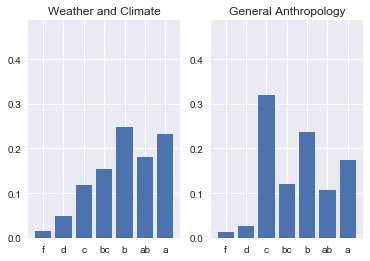

In [36]:
class_compare('Weather and Climate','General Anthropology')

Here's a function that compiles a master grade distribution summary from a list of grades. So, you can feed it, say, every class in a given subject and it will produce a master grade distribution for the subject. The try-except block takes care of the issue where some courses don't have any attached grades, causing you to get a divide by zero error when the neaten_grades function tries to make the ratios for the grade distribution

In [8]:
def subject_summary(list_of_classes):
    df = neaten_grades(get_grades(list_of_classes[0]))
    for n in range(1,len(list_of_classes)):
        try:
            temp = neaten_grades(get_grades(list_of_classes[n]))
            df['counts'] = df['counts'] + temp['counts']
        except:
            pass
    df['ratio'] = [x/sum(df['counts']) for x in df['counts']]
    return df

For instance, you can feed it two different departments/subjects and put the resulting distributions into the compare summary function

In [38]:
socio = subject_summary(list(set(courses[courses['subject']=='Sociology']['name'])))
chem = subject_summary(list(set(courses[courses['subject']=='Chemistry']['name'])))

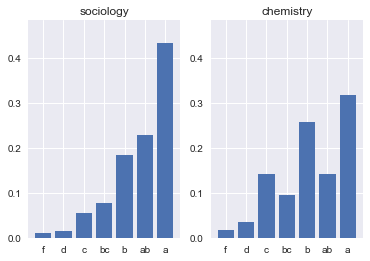

In [39]:
subject_compare('sociology', socio, 'chemistry',chem)

Because we're dealing with discrete distributions, we have to be careful about how we compare things. Options include comparing one part of the distribution, like the fraction of the class getting As, thinking about them as Bernoulli distributions. This has the benefit of having a clear 'effect size' that we can compare - given the size of some of these samples (that is, the overall number of grades), relatively minor differences between distributions will look statistically 'significant'. It will be good to have a way to quantify a bit how big the difference is in a practical way.

I also want a way to quantify if distributions between classes or subjects are different in a more holistic way. My first thought was to use a Chi-squared test. Henry suggested using the Mann-Whitney rank sum test, which I had not used before, but looking into, it's clearly the appropriate sort of test to use in this situation. Thanks Henry!

Again, I want to systematize this sort of analysis with a series of functions that will do the work for any arbitrary set of classes/subjects.

Here's a function to take in two sets of summary stats, performs Fisher's exact test and returns the ratio of A values along with the p value of the test

In [9]:
def a_ratio_compare(name1,sumdf1,name2,sumdf2):
    counts1 = [sumdf1['counts'][0],sum(sumdf1['counts'][1:])]
    counts2 = [sumdf2['counts'][0],sum(sumdf2['counts'][1:])]
    ratio1 = round((counts1[0]/sum(counts1))*100,2)
    ratio2 = round((counts2[0]/sum(counts2))*100,2)
    p_value = stats.fisher_exact([counts1, counts2])[1]
    print('{}% of people of in {} get As'.format(ratio1,name1))
    print('{}% of people of in {} get As'.format(ratio2,name2))
    print('The p-value associated with this {}% difference is {}'.format(ratio2 - ratio1,p_value))
    return ratio1, ratio2, p_value

In [22]:
#Along with a funtion that takes in two classes and runs all relevant functions, and a function that
#takes in two grouped lists of classes and runs the aggregate functions

def class_graph_compare(class1, class2):
    class_compare(class1, class2)
    class1_df = neaten_grades(get_grades(class1))
    class2_df = neaten_grades(get_grades(class2))
    ratio1, ratio2, p_value = a_ratio_compare(class1,class1_df,class2, class2_df)
    return ratio1, ratio2, p_value

def subject_graph_compare(name1, list_of_class1, name2, list_of_class2):
    summary1 = subject_summary(list_of_class1)
    summary2 = subject_summary(list_of_class2)
    subject_compare(name1, summary1, name2, summary2)
    ratio1, ratio2, p_value = a_ratio_compare(name1,summary1,name2,summary2)
    return ratio1, ratio2, p_value

23.18% of people of in Weather and Climate get As
17.39% of people of in General Anthropology get As
The p-value associated with this -5.789999999999999% difference is 4.817628226200356e-18


(23.18, 17.39, 4.817628226200356e-18)

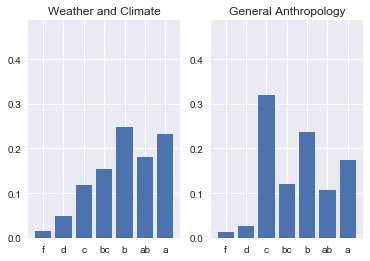

In [40]:
class_graph_compare('Weather and Climate','General Anthropology')

Here's a similar set of functions that do class to class comparisons by way of the Mann-Whitney U test. This looks at the overall distribution, rather than just the ratio of As. This creates a different sort of barrier to classify distributions as different - two classes may give out similar fractions of As, but different fractions of Bs and Cs, Mann-Whitney might decide that the difference is significant. Similarly, classes with very different fractions of As may be sufficiently similar elsewhere to not look statistically distinct to Mann-Whitney. Unfortunately, there isn't as straight forward a way to call out "effect size". Any measure of distance between the distributions will be less interpretable than something like the difference in ratio of A grades.

The Mann_whit function creates lists of ranks - A's outrank AB's outrank B's, etc. - which it can then easily feed into the Scipy Stats mannwhitneyu function.

In [105]:
def mann_whit(sumdf1, sumdf2):
    grades = list(reversed(['a','ab','b','bc','c','d','f']))
    ranks1 = []
    ranks2 = []
    for n in range(0,len(grades)):
        ranks1 = ranks1 + [n]*sumdf1['counts'][grades[n]]
        ranks2 = ranks2 + [n]*sumdf2['counts'][grades[n]]
    stat, p_value = stats.mannwhitneyu(ranks1,ranks2)
    return stat, p_value

def class_graph_mw_comp(class1, class2):
    class_compare(class1, class2)
    class1_df = neaten_grades(get_grades(class1))
    class2_df = neaten_grades(get_grades(class2))
    stat, p_value = mann_whit(class1_df,class2_df)
    return 'The Mann-Whitney test statistic is {}, corresponding to a p_value of {}'.format(stat, round(p_value,5))

'The Mann-Whitney test statistic is 22279200.0, corresponding to a p_value of 0.0'

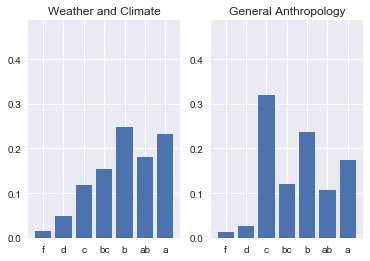

In [106]:
class_graph_mw_comp('Weather and Climate','General Anthropology')

Now I have a good framework for comparing classes or subjects. I also want a way to split any given class into the different sections, see if grades across sections/meeting times differed substantially. This turned out to be a little more complicated than anticipated, because one of the tables was poorly set up and partly because the queries need to reference some combination of course uuid, offering uuid, schedule uuid and section number. There was a bit of trial and error figuring out what would pull what I wanted.

First, getting a master dataframe of schedule uuids. This required cleaning because half of the table had all of the information squished together in the first column.

In [12]:
sections = sql_df('''select * from sections ''')

sections['course_offering_uuid'] = [sections['uuid'][n].split(',')[1].strip('"') if len(sections['uuid'][n].split(','))>1 
                                    else sections['course_offering_uuid'][n]for n in range(0,len(sections))]


sections['section_type'] = [sections['uuid'][n].split(',')[2].strip('"') if len(sections['uuid'][n].split(','))>1 
                                    else sections['section_type'][n]for n in range(0,len(sections))]


sections['number'] = [sections['uuid'][n].split(',')[3].strip('"') if len(sections['uuid'][n].split(','))>1 
                                    else sections['number'][n]for n in range(0,len(sections))]

sections['room_uuid'] = [sections['uuid'][n].split(',')[4].strip('"') if len(sections['uuid'][n].split(','))>1 
                                    else sections['room_uuid'][n]for n in range(0,len(sections))]

sections['schedule_uuid'] = [sections['uuid'][n].split(',')[5].strip('"') if len(sections['uuid'][n].split(','))>1 
                                    else sections['schedule_uuid'][n]for n in range(0,len(sections))]

sections['uuid'] = [sections['uuid'][n].split(',')[0].strip('"') if len(sections['uuid'][n].split(','))>1 
                                    else sections['uuid'][n]for n in range(0,len(sections))]

Some helper functions: Pulling grades from a course uuid and a section number, a short function to do the sql queries for the schedules and an intermediate summary function, which looks at one offering uuid and returns with the morning/afternoon summaries for it.

In [47]:
def grades_from_uuid_sect(uuid,sections):
    if len(sections) == 1:
        grades = sql_df('''select * from grade_distributions 
        where course_offering_uuid = "{}" 
        and section_number = {}'''.format(uuid,sections[0]))
    else:
        grades = sql_df('''select * from grade_distributions 
        where course_offering_uuid = "{}" 
        and section_number = {}'''.format(uuid,sections[0]))
        for n in range(1,len(sections)):
            temp = sql_df('''select * from grade_distributions 
        where course_offering_uuid = "{}" 
        and section_number = {}'''.format(uuid,sections[n]))
            grades = pd.concat([grades,temp])
    return grades

def section_dfs(section_uuid, number):
    df = sql_df('''select * from schedules where uuid = "{}"'''.format(section_uuid))
    df['number'] = number
    return df

def uuid_morn_aft(uuid):
    sched_uuids = list(sections[sections['course_offering_uuid'] == '{}'.format(uuid)]['schedule_uuid'])
    sections_list = list(sections[sections['course_offering_uuid'] == '{}'.format(uuid)]['number'])
    if len(sched_uuids) == 1:
        df = section_dfs(sched_uuids[0],sections_list[0])
    else:
        df = section_dfs(sched_uuids[0],sections_list[0])
        for n in range(0,len(sched_uuids)):
            temp = section_dfs(sched_uuids[n],sections_list[n])
            df = pd.concat([df,temp])
            
    morning_ids = []
    afternoon_ids = []
    
    for n in range(0,len(df)):
        if int(df.iloc[n]['start_time']) < 720:
            morning_ids.append(df.iloc[n]['number'])
        else:
            afternoon_ids.append(df.iloc[n]['number'])
    
    morning_ids = list(set(morning_ids))
    afternoon_ids = list(set(afternoon_ids))
    # Need to check that there are classes in both the morning and afternoon!
    # Before I put this in, it was breaking my code
    if len(morning_ids) != 0:
        morning_dist = neaten_grades(grades_from_uuid_sect(uuid,morning_ids))
    else:
        morning_dist = {'counts':[0,0,0,0,0,0,0]}
        
    if len(afternoon_ids) != 0:
        afternoon_dist = neaten_grades(grades_from_uuid_sect(uuid,afternoon_ids))
    else:
        afternoon_dist = {'counts':[0,0,0,0,0,0,0]}
    return morning_dist, afternoon_dist

In [14]:
def morn_aft_comp(name):
    uuid_list = list(courses[courses['name']==name]['uuid'])
    if len(uuid_list) == 1:
        morning_dist, afternoon_dist = uuid_morn_aft(uuid_list[0])
    else:
        morning_dist, afternoon_dist = uuid_morn_aft(uuid_list[0])
        for n in range(1,len(uuid_list)):
            morn_temp, aft_temp = uuid_morn_aft(uuid_list[n])
            morning_dist['counts'] = [morning_dist['counts'][n] + morn_temp['counts'][n] for n in range(0,7)]
            afternoon_dist['counts'] = [afternoon_dist['counts'] + aft_temp['counts'][n] for n in range(0,7)]
        morning_dist['ratio'] = [morning_dist['counts'][n]/sum(morning_dist['counts']) 
                                 for n in range(0,len(morning_dist))]
        afternoon_dist['ratio'] = [afternoon_dist['ratio'][n]/sum(afternoon_dist['counts'])
                                  for n in range(0,len(afternoon_dist))]
    return morning_dist, afternoon_dist

Finally, a master function which takes a class, looks up all the sections, aggregates the grades across the morning sections and the afternoon sections and then compares them

In [15]:
def morn_aft_comp(name):
    uuid_list = list(courses[courses['name']==name]['uuid'])
    if len(uuid_list) == 1:
        morning_dist, afternoon_dist = uuid_morn_aft(uuid_list[0])
    else:
        morning_dist, afternoon_dist = uuid_morn_aft(uuid_list[0])
        for n in range(1,len(uuid_list)):
            try:
                morn_temp, aft_temp = uuid_morn_aft(uuid_list[n])
                morning_dist['counts'] = [morning_dist['counts'][n] + morn_temp['counts'][n] for n in range(0,7)]
                afternoon_dist['counts'] = [afternoon_dist['counts'][n] + aft_temp['counts'][n] for n in range(0,7)]
            except:
                pass
        morning_dist['ratio'] = [morning_dist['counts'][n]/sum(morning_dist['counts']) 
                                 for n in range(0,len(morning_dist))]
        afternoon_dist['ratio'] = [afternoon_dist['counts'][n]/sum(afternoon_dist['counts'])
                                  for n in range(0,len(afternoon_dist))]

    stat, p_value = mann_whit(morning_dist,afternoon_dist)
    subject_compare('Morning', morning_dist,'Afternoon', afternoon_dist)
    return 'The Mann-Whitney test statistic is {}, corresponding to a p_value of {}'.format(stat, round(p_value,5))


Unfortunately, this function breaks if either a) a class has no sections in either the morning or afternoon or b) more importantly, there are sections listed in the in the sections table but that don't exist in the grade distribution tables. This is surprisingly common, though the function still works for many courses.

'The Mann-Whitney test statistic is 14161579.5, corresponding to a p_value of 0.3867'

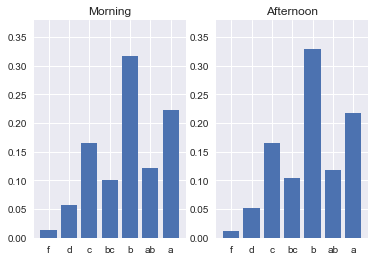

In [115]:
morn_aft_comp('Intro Financial Accounting')

Now that we have all this structure in place, we can easily compare any two courses, subjects or even sections within a course!

Let's say that you are a liberal arts major who wants to choose a science class to fulfill your requirements. Physics and Chemistry both sound interesting but you are worried that those classes might be too hard. Which department gives out more As? Do the departments have different grade distributions?

It's easy to check! First let's compare the departments overall.

31.6% of people of in Chemistry get As
39.9% of people of in Physics get As
The p-value associated with this 8.299999999999997% difference is 0.0


(31.6, 39.9, 0.0)

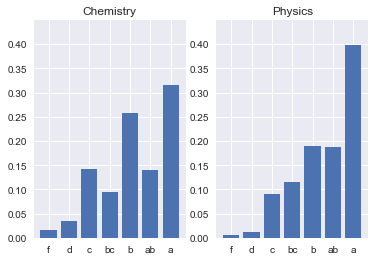

In [43]:
#Build lists of all classes in the relevant departments
chem = list(set(courses[courses['subject']=='Chemistry']['name']))
physics = list(set(courses[courses['subject']=='Physics']['name']))


#Insert into comparison function
subject_graph_compare('Chemistry',chem, 'Physics', physics)

It looks like As are much more common in physics than in chemistry! Visually, it's also clear that there are more ABs in physics, and fewer Cs and Fs, so it definitely looks like the grading is friendlier in the physics department....

But then it occurs to you that these overall comparisons are looking at a lot of higher level courses - advanced courses that only science majors take. Maybe the overall ratio of As in the physics department is being pulled up by the physics majors getting good grades in the advanced classes. You really want to know what the grading is like in the intro level courses.

So, let's look at the list of courses in each department and pick out the interesting intro, overview courses to compare.

In [25]:
chem

['Chemistry in Our World',
 'Physical Chemistry Laboratory',
 'Intmed Organic Chem Lab',
 'Seminar-Chemical Biology (Adv)',
 'Advanced Inorganic Chemistry',
 'Spctroscpy&Spectrochem Anal',
 'Topic-Macromoleculr/Biophys',
 'Entering Research I',
 'Research-Organic',
 'Chemical Crystallography',
 'Chem of Inorganic Materials',
 'Elementary Organic Chem Lab',
 'Research-Materials Chemistry',
 'Chemical Principles I',
 'General Chem II Laboratory',
 'General Chemistry',
 'Chemical Principles II',
 'Industrial Chem and Business',
 'Materials Chem of Polymers',
 'Intro Organic Chemistry Lab',
 'Phys Chem of Macromolecules',
 'Rsch-Macromolecular Chem',
 'Synthetic Organic Chemistry',
 'Experimental Spectroscopy',
 'Chem & Stat Thermodynamics',
 'Smr-Bio-Organic Chemistry',
 'Physical Chemistry of Surfaces',
 'Electrochemistry',
 'Protein Characterization',
 'Chemistry Demonstrations',
 'Topic-Instrmtn:Mass Spectrmtry',
 'Separations-Chem Analysis',
 'Organometal-Transitn Elemts',
 'Topics in

In [26]:
physics

['Quantum Mechanics',
 'Plasma Magnetohydrodynamics',
 'General Physics',
 'A Modern Intro to Physics',
 'null',
 'Graduate Laboratory',
 'Exp Tech-Particle Physics',
 'Lasers',
 'Thermal Physics',
 'Colloquium',
 'Senior Honors Thesis',
 'Mod Physics for Engineers',
 'Advanced Quantum Mechanics',
 'Radionuclides-Med & Biology',
 'Wave Motion and Optics',
 'Advanced Laboratory',
 'Adv Solid State Physics',
 'Smr-Solid State Physics',
 'Theoreticl Physics-Dynamics',
 'Seminar in Plasma Physics',
 'Physics Today',
 'High Energy Astrophysics',
 'Atomic and Quantum Physics',
 'Electromagnetic Fields',
 'Modern Physics',
 'Intmed Lab-Mech&Mod Physics',
 'Ideas of Modern Physics',
 'Intro to Modern Physics',
 'Introduction to Plasmas',
 'Advanced Ultrasound Physics',
 'Plasma Confinement&Heating',
 'Applied Optics',
 'Theor Physics-Electrodynmcs',
 'Nuclear, Particle&Astrophysics',
 'Radioisotopes-Med & Biology',
 'Experimntl Nuclear Physics',
 'Radiolgcal Physcs&Dosimetry',
 'Solid State Ph

You settle on 'Chemistry in Our World' in the chemistry department and 'A Modern Intro to Physics' in the physics department. Are the grade distributions different between these two classes?

Again, running the comparison is easy!

17.57% of people of in Chemistry in Our World get As
30.31% of people of in A Modern Intro to Physics get As
The p-value associated with this 12.739999999999998% difference is 1.601213962519963e-10


(17.57, 30.31, 1.601213962519963e-10)

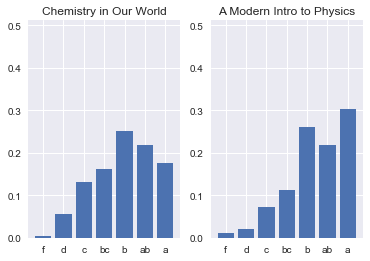

In [44]:
class_graph_compare('Chemistry in Our World','A Modern Intro to Physics')

It definitely looks like the physics class has more As, so that's your class! Interestingly the number of ABs, Cs and BCs look pretty similar. I wonder what the test for entire distribution is like...

'The Mann-Whitney test statistic is 419625.0, corresponding to a p_value of 0.0'

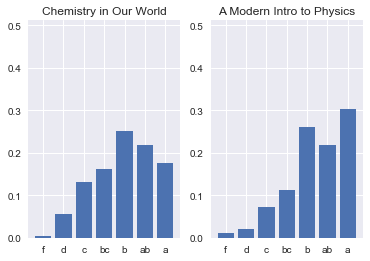

In [108]:
class_graph_mw_comp('Chemistry in Our World',
                    'A Modern Intro to Physics')

Not similar enough in the rest of the distributions to make up for the 13% more A's given in the physics class!

Of course, you also intend to take statistics, the most important class, naturally! The only question is which section do you sign up for? Let's see if there's a difference in grade distributions between the morning and the afternoon sections...

'The Mann-Whitney test statistic is 2183716.0, corresponding to a p_value of 0.11473'

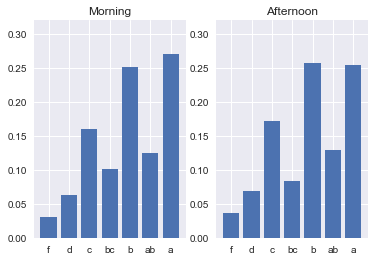

In [109]:
morn_aft_comp('Intro-Theory of Probability')

Nope, the distributions look pretty similar. There are slightly more As in the morning class, but the distributions look similar enought that we can't reject the null hypothesis that they are the same according to the Mann-Whitney U-test.

One final test to run is to compare all STEM course vs. non-Stem courses. Are As really harder to come by in the STEM courses? The first task is compiling a list of STEM/non-STEM subjects, a task which requires a certain amount of value judgments, since the subject list includes some overlap, numerous 'subjects' that aren't really academic departments strictly speaking (like 'professional development' or 'interdisciplinary') and includes some vocational programs that don't really fit comfortably into the STEM/non-STEM categories.

Here's one pass at a list of classic STEM and non-STEM subjects:

In [92]:
stem_subjects = ["Soil Science","Accounting and Information Systems","Biological Systems Engineering",
      "Finance, Investment and Banking","Horticulture","Entomology","Information Systems",
      "Human Oncology","Civil and Environmental Engineering",
      "Risk Management and Insurance","Actuarial Science","Industrial and Systems Engineering",
      "Agroecology","Communication Sciences and Disorders","Agronomy",
      "Interdisciplinary Courses (Engineering)","Population Health Sciences","Statistics","Comparative Biosciences",
      "Psychiatry","Computer Sciences",
      "Patho-Biological Sciences","Pathology and Laboratory Medicine","Pediatrics","Food Science",
      "WILDLIFE ECOLOGY","Mathematics",
      "Economics","Zoology","Mechanical Engineering","Medical Genetics",
      "Astronomy","Medical Microbiology and Immunology","Medical Physics",
      "Integrated Science","CLINICAL LABORATORY SCIENCE","Microbiology",
      "Medicine","Physics","Science and Technology Studies","Materials Science and Engineering",
      "Biomolecular Chemistry","Atmospheric and Oceanic Sciences","Senior Medical Program",
      "Physiology","Military Science","Plant Pathology","Molecular Biology","Genetics",
      "Geological Engineering","Geoscience","Naval Science","Neurology",
      "Educational Psychology","Neuroscience",
      "Neuroscience Training Program","Electrical and Computer Engineering","Nuclear Engineering",
      "Biochemistry","Biology","Biology Core Curriculum","Biomedical Engineering","Botany",
      "Cell and Regenerative Biology","Chemical and Biological Engineering",
      "Chemistry","Engineering Mechanics and Astronautics","Engineering Physics",
      "Agricultural and Applied Economics"]
non_stem_subjects = ["ENGLISH","Linguistics","Human Development and Family Studies","English","General Business","International Business",
         "Management and Human Resources","Marketing","Design Studies","Classics",
         "Civil Society and Community Studies","Communication Arts","INDUSTRIAL RELATIONS",
         "Folklore Program","Comparative Literature","American Indian Studies",
         "Theatre and Drama","Urban and Regional Planning","Curriculum and Instruction",
         "Gender and Women’s Studies","East Asian Languages and Literature","East Asian Area Studies",
         "Religious Studies","Philosophy","Art History","Asian American Studies","Asian Languages and Cultures",
         "Asian Languages and Cultures: Languages","International Studies","Italian (French and Italian)",
         "Rehabilitation Psychology and Special Education","Scandinavian Studies","Jewish Studies",
         "Journalism and Mass Communication","Medieval Studies","Languages and Cultures of Asia",
         "French (French and Italian)","Languages and Cultures of Asia - Languages","Latin (Classics)",
         "Slavic (Slavic Languages)","Latin American, Caribbean, and Iberian Studies","Law","Social Work",
         "Legal Studies","Political Science","Library and Information Studies","German",
         "German, Nordic, and Slavic","Educational Leadership and Policy Analysis","Greek (Classics)",
         "Literature in Translation","Educational Policy Studies","HEBREW","Hebrew-Biblical",
         "Hebrew-Modern","History","Medical History and Bioethics","History of Science",
         "African Languages and Literature","Afro-American Studies",
         "Chicana/o and Latina/o Studies","Sociology"]

Now, to convert these subjects into a list of classes and from there to compile the summary, grade distribution dataframes:

In [93]:
stem_classes = []
for subject in stem_subjects:
    stem_classes = stem_classes + list(set(courses[courses['subject']==subject]['name']))
    
non_stem_classes = []
for subject in non_stem_subjects:
    non_stem_classes = non_stem_classes + list(set(courses[courses['subject']==subject]['name']))

#removing some duplicated cross-listed courses:
stem_classes = sorted(list(set(stem_classes)))
non_stem_classes = sorted(list(set(non_stem_classes)))

In [94]:
stem_summary = subject_summary(stem_classes)
non_stem_summary = subject_summary(non_stem_classes)

One minor tweak to my subject compare functions to bring in the Mann-Whitney test which I hadn't included before, and to accept the summary dataframes rather than the list of classes (this is a long list of classes, so it'll be more efficient to create the summary table once).

In [90]:
def class_subject_mw_comp(name1,summary1, name2, summary2):
    subject_compare(name1,summary1, name2, summary2)
    stat, p_value = mann_whit(summary1,summary2)
    return 'The Mann-Whitney test statistic is {}, corresponding to a p_value of {}'.format(stat, round(p_value,5))

def subject_graph_compare(name1,summary1, name2, summary2):
    subject_compare(name1, summary1, name2, summary2)
    ratio1, ratio2, p_value = a_ratio_compare(name1,summary1,name2,summary2)
    return ratio1, ratio2, p_value

And now we can run our comparison:

'The Mann-Whitney test statistic is 1039662132557.0, corresponding to a p_value of 0.0'

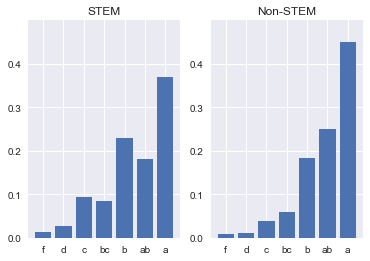

In [110]:
class_subject_mw_comp('STEM',stem_summary, 'Non-STEM', non_stem_summary)

37.02% of people of in STEM get As
44.97% of people of in Non-STEM get As
The p-value associated with this 7.949999999999996% difference is 0.0


(37.02, 44.97, 0.0)

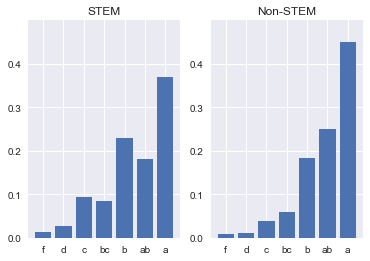

In [111]:
subject_graph_compare('STEM',stem_summary, 
                      'Non-STEM', non_stem_summary)

(0.0, 0.4697401938170033)

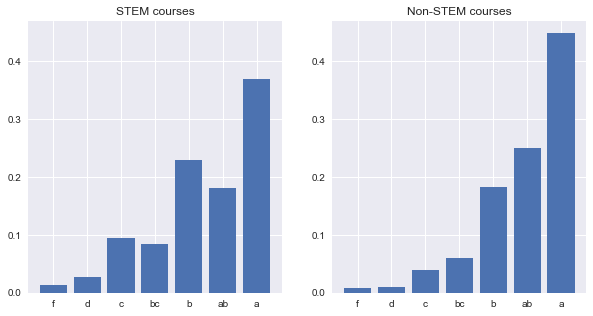

In [97]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.bar(list(reversed(stem_summary.index)),list(reversed(stem_summary['ratio'])))
plt.title('STEM courses')
plt.ylim(top = max(list(non_stem_summary['ratio']) + list(stem_summary['ratio']))+.02)
    
plt.subplot(1,2,2)
plt.bar(list(reversed(non_stem_summary.index)),list(reversed(non_stem_summary['ratio'])))
plt.title('Non-STEM courses')
plt.ylim(top = max(list(non_stem_summary['ratio']) + list(stem_summary['ratio']))+.02)


